In [135]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [ ]:
# Team Lead (team) performance comparison (error rate and CSAT)

error = pd.read_csv("Error_data.csv", encoding='utf-8')

pd.set_option('display.max_columns', None) # I want to see all the columns when calling the dataset
pd.set_option('display.max_rows', None) # I want to see all the rows when calling the dataset


error['Error Rate'] = error['Error Rate'].str.rstrip('%').astype(float) / 100
error['CSAT'] = error['CSAT'].str.rstrip('%').astype(float) / 100

error['Error Rate'] = pd.to_numeric(error['Error Rate'], errors='coerce')
# error=coerce setting number 'Not a number'/NaN if there are datas that are not number.
error['CSAT'] = pd.to_numeric(error['CSAT'], errors='coerce')

team_performance = error.groupby('TeamLead')[['Error Rate', 'CSAT']].mean().reset_index()
display(team_performance[['TeamLead', 'Error Rate', 'CSAT']])

plt.figure(figsize=(10, 6))


team_leads = np.arange(len(team_performance['TeamLead']))# Define the positions for the team leads

plt.bar(team_leads, team_performance['Error Rate'], color='skyblue', label='Error Rate') # Plot the 'Error Rate' bars at the base
plt.bar(team_leads, team_performance['CSAT'], bottom=team_performance['Error Rate'], color='lightgreen', label='CSAT')
# Plot the 'CSAT' bars on top of 'Error Rate' to stack them

plt.title('Team Performance Comparison: Stacked Error Rate and CSAT')
plt.xlabel('Team Lead')
plt.ylabel('Average Values (in %)')
plt.xticks(team_leads, team_performance['TeamLead'])  # Replace numerical x-ticks with TeamLead names
plt.legend(title='Metrics')

plt.show()


In [ ]:
# Error Rate and Customer Rate Monthly Trend Analysis (team leads performance)

error = pd.read_csv("Error_data.csv", encoding='utf-8')

pd.set_option('display.max_columns', None) # I want to see all the columns when calling the dataset
pd.set_option('display.max_rows', None) # I want to see all the rows when calling the dataset

error['Date'] = pd.to_datetime(error['Date'])
error['Month'] = error['Date'].dt.to_period('M') # adding another column for month


error['Error Rate'] = error['Error Rate'].str.rstrip('%').astype(float) / 100
error['CSAT'] = error['CSAT'].str.rstrip('%').astype(float) / 100

error['Error Rate'] = pd.to_numeric(error['Error Rate'], errors='coerce')
# error=coerce setting number 'Not a number'/NaN if there are datas that are not number.
error['CSAT'] = pd.to_numeric(error['CSAT'], errors='coerce')

performance_trend = error.groupby('Month')[['Error Rate', 'CSAT']].mean().reset_index()

performance_trend['Month'] = performance_trend['Month'].dt.to_timestamp()

display(performance_trend[['Month', 'Error Rate', 'CSAT']])

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Error Rate', data=performance_trend, label='Error Rate', color='skyblue')
sns.lineplot(x='Month', y='CSAT', data=performance_trend, label='CSAT', color='lightgreen')

plt.title('Error Rate and CSAT Monthly Trend Analysis')
plt.xlabel('Month')
plt.ylabel('Average Values (in %)')
plt.xticks(rotation=45)
plt.legend(title='Metrics')

plt.tight_layout()
plt.show()

In [ ]:
# Analyzing the impact of shift on performance

error = pd.read_csv("Error_data.csv", encoding='utf-8')

pd.set_option('display.max_columns', None) # I want to see all the columns when calling the dataset
pd.set_option('display.max_rows', None) # I want to see all the rows when calling the dataset

error['Error Rate'] = error['Error Rate'].str.rstrip('%').astype(float) / 100
error['CSAT'] = error['CSAT'].str.rstrip('%').astype(float) / 100

error['Error Rate'] = pd.to_numeric(error['Error Rate'], errors='coerce')
error['CSAT'] = pd.to_numeric(error['CSAT'], errors='coerce')

shift_analysis = error.groupby('Shift')[['Error Rate', 'CSAT']].mean().reset_index()

display(shift_analysis[['Shift', 'Error Rate', 'CSAT']])


# Create a boxplot for Error Rate and CSAT by Shift
plt.figure(figsize=(12, 6))

sns.boxplot(x='Shift', y='Error Rate', data=error, hue='Shift', palette='Blues')

plt.title('Error Rate Distribution Across Shifts')
plt.xlabel('Shift')
plt.ylabel('Error Rate (in %)')

plt.show()

# Create a boxplot for CSAT by Shift
plt.figure(figsize=(12, 6))
sns.boxplot(x='Shift', y='CSAT', data=error, hue='Shift', palette='Greens')

plt.title('CSAT Distribution Across Shifts')
plt.xlabel('Shift')
plt.ylabel('CSAT (in %)')

plt.show()


In [ ]:
# tenure performance analysis

error = pd.read_csv("Error_data.csv", encoding='utf-8')

pd.set_option('display.max_columns', None) # I want to see all the columns when calling the dataset
pd.set_option('display.max_rows', None) # I want to see all the rows when calling the dataset

error['Error Rate'] = error['Error Rate'].str.rstrip('%').astype(float) / 100
error['CSAT'] = error['CSAT'].str.rstrip('%').astype(float) / 100

error['Error Rate'] = pd.to_numeric(error['Error Rate'], errors='coerce')
error['CSAT'] = pd.to_numeric(error['CSAT'], errors='coerce')

tenure_performance = error.groupby('Tenure')[['Error Rate', 'CSAT']].mean().reset_index()

display(tenure_performance[['Tenure', 'Error Rate', 'CSAT']])

pivot_table = error.pivot_table(values=['Error Rate', 'CSAT'], index='Tenure', aggfunc='mean')

plt.figure(figsize=(10, 6))

# Heatmap of Error Rate and CSAT averages by Tenure
sns.heatmap(pivot_table, annot=True, cmap='plasma', fmt='.2f')

plt.title('Error Rate and CSAT Averages by Tenure (Heatmap)')
plt.show()

In [ ]:
# Employee Age performance analysis
# min. age is 21
# max age is 65

error = pd.read_csv("Error_data.csv", encoding='utf-8')

# Define the bins for age ranges and corresponding labels
bins = [21, 30, 40, 50, 60, 65]  # Modify as needed for your analysis
labels = ['21-30', '31-40', '41-50', '51-60', '61-65']

# Creating Age group with .cut() function
error['Age Group'] = pd.cut(error['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

error['Error Rate'] = error['Error Rate'].str.rstrip('%').astype(float) / 100
error['CSAT'] = error['CSAT'].str.rstrip('%').astype(float) / 100

error['Error Rate'] = pd.to_numeric(error['Error Rate'], errors='coerce')
error['CSAT'] = pd.to_numeric(error['CSAT'], errors='coerce')

age_analysis = error.groupby('Age Group', observed=True)[['Error Rate', 'CSAT']].mean().reset_index()

display(age_analysis[['Age Group', 'Error Rate', 'CSAT']])

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Error Rate', y='CSAT', hue='Age Group', data=error, palette='dark', s=100)

# Customize the plot
plt.title('Error Rate vs CSAT by Age Group')
plt.xlabel('Error Rate (in %)')
plt.ylabel('CSAT (in %)')
plt.legend(title='Age Group')

# Show the plot
plt.show()

,TeamLead,Error Rate,CSAT
0,Buckey Barnes,0.028004,0.525474
1,Don De Marco,0.017643,0.510021
2,Joey Jordison,0.016999,0.518290


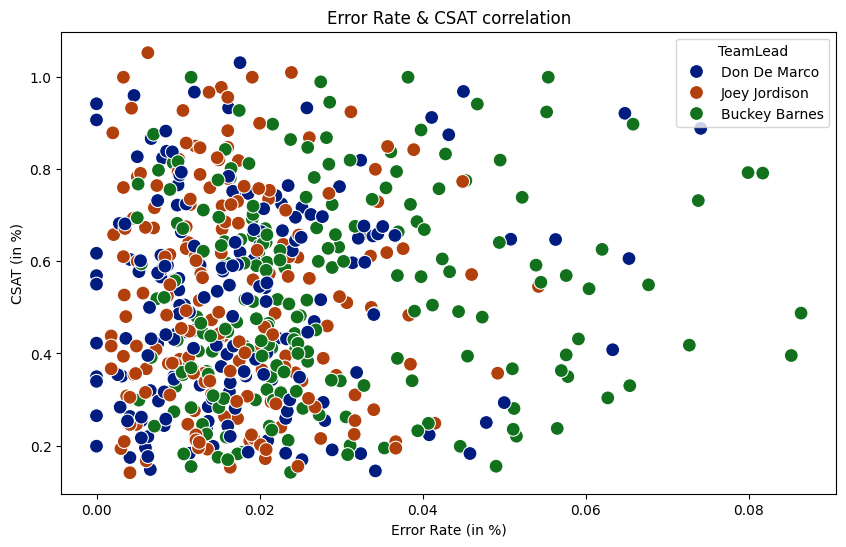

In [193]:
# Error Rate and CSAT correlation (Based on Team Lead or Shift)
# you can change to shift TeamLead to check the correlation based on shift

error = pd.read_csv("Error_data.csv", encoding='utf-8')

error['Error Rate'] = error['Error Rate'].str.rstrip('%').astype(float) / 100
error['CSAT'] = error['CSAT'].str.rstrip('%').astype(float) / 100

error['Error Rate'] = pd.to_numeric(error['Error Rate'], errors='coerce')
error['CSAT'] = pd.to_numeric(error['CSAT'], errors='coerce')

Correlation_analysis = error.groupby('TeamLead')[['Error Rate', 'CSAT']].mean().reset_index()

display(Correlation_analysis[['TeamLead', 'Error Rate', 'CSAT']])

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Error Rate', y='CSAT', hue='TeamLead', data=error, palette='dark', s=100)

# Customize the plot
plt.title('Error Rate & CSAT correlation')
plt.xlabel('Error Rate (in %)')
plt.ylabel('CSAT (in %)')
plt.legend(title='TeamLead')

# Show the plot
plt.show()